In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import pickle
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot as plt
%matplotlib inline

# Allows more columns to be shown for outputs
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5200)

In [2]:
#set directories
dirPData = "C:/Users/kevin/Google Drive/AML/Projects/Coursework/PData/"
dirPOutput = "C:/Users/kevin/Google Drive/AML/Projects/Coursework/POutput/"

In [3]:
#import variables
f_name = dirPData + 'ohprepVars.pickle'

with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
df_test = dict_['df_test']
df_train = dict_['df_train']
OH_df_test = dict_['OH_df_test']
OH_df_train = dict_['OH_df_train']
del f_name, dict_

In [4]:
#prepare X and y
train_y = df_train['target'].values

var_notToUse = ['id']

allFeatures = [var for var in OH_df_train]

train_X = OH_df_train[allFeatures]
test_X = OH_df_test[allFeatures]

#prepare validation data
train_Xv, test_Xv, train_yv, test_yv = train_test_split(train_X, train_y, test_size=0.25, random_state=1)

# Decision Tree Model
## Decision Tree Classifier 0.62254
### Kaggle Score: 0.62254, Validation Score: 0.6145972801145215
<img src="dectree1.png">

In [5]:
dtc_model1v = DecisionTreeClassifier(random_state=1)
dtc_model1v.fit(train_Xv, train_yv)
dtcprediction1v = dtc_model1v.predict_proba(test_Xv)

In [6]:
print("Validation score:",roc_auc_score(test_yv, dtcprediction1v[:,1]))

Validation score: 0.6145972801145215


In [7]:
dtc_model1 = DecisionTreeClassifier(random_state=1)
dtc_model1.fit(train_X, train_y)
dtcprediction1 = dtc_model1.predict_proba(test_X)

In [8]:
dtcpred1 = {'id': df_test['id'].values,
        'target': dtcprediction1[:,1]}
df_dtcpred1 = DataFrame(dtcpred1)

df_dtcpred1 = df_dtcpred1.reset_index().set_index('id')
df_dtcpred1 = df_dtcpred1.drop(columns='index')
df_dtcpred1.head()

,target
id,
5,0.0
10,0.0
11,0.0
13,0.0
16,0.0


In [9]:
df_dtcpred1.to_csv(r'C:/Users/kevin/Google Drive/AML/Projects/Coursework/POutput/dectree1.csv')

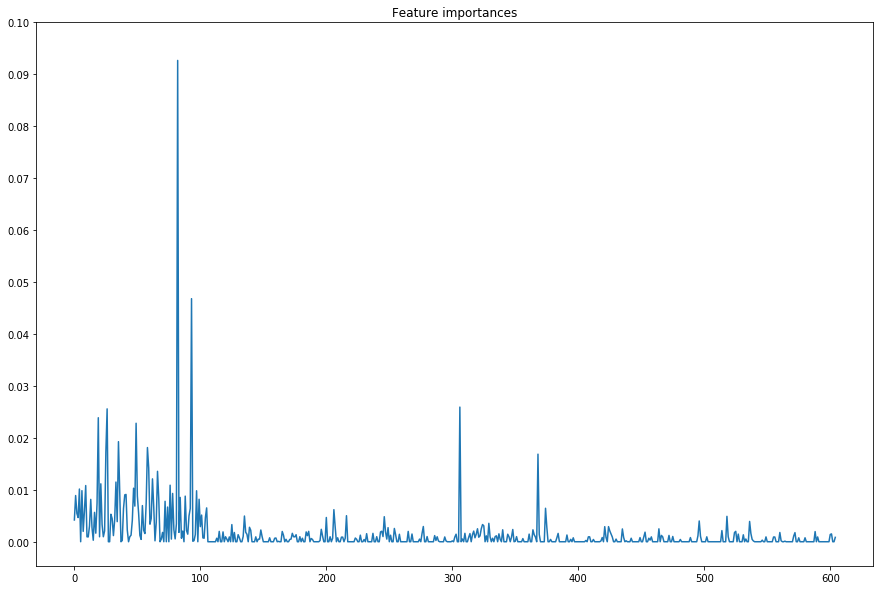

In [10]:
dtcfeatsUsed1 = dtc_model1.feature_importances_
plt.figure(figsize=(15,10))
plt.title("Feature importances")
plt.plot(dtcfeatsUsed1)
plt.yticks([0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])
plt.show()

* Plot suggests a large amount of features are not informative.
* I would expect all features below 0.005 to have no predictive power